       Year Harvested Acres          County
14     1998               0    State Totals
15     1998           31117          Butte 
16     1998           20150         Colusa 
17     1998           46968         Fresno 
18     1998           21339          Glenn 
19     1998           79587           Kern 
20     1998            2097          Kings 
21     1998           43635         Madera 
22     1998           74182         Merced 
23     1998             158     Sacramento 
24     1998           38500    San Joaquin 
25     1998            1501         Solano 
26     1998           87000     Stanislaus 
27     1998            4026         Sutter 
28     1998            5650         Tehama 
29     1998           13395         Tulare 
30     1998            5879           Yolo 
31     1998            1181           Yuba 
32     1998            1202  Sum of Others 
33     1998          477567    State Totals
34     1998             492       Monterey 
35     1998             208  Sum

C:\Users\slalonde\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
C:\Users\slalonde\Anaconda3\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


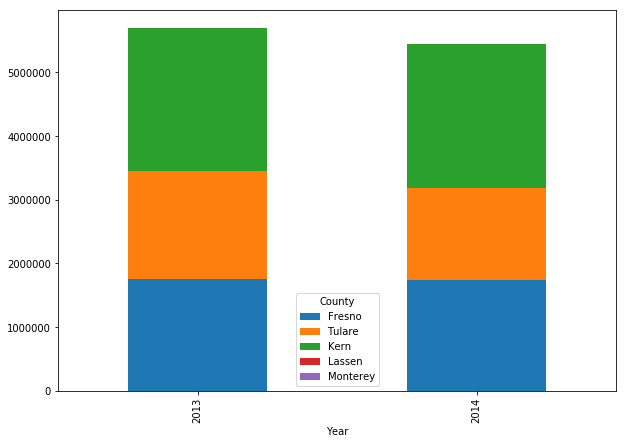

In [20]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

path =r'C:\Users\slalonde\Documents\Personal\DataChallenge\output\CASS'
filenames = glob.glob(path + "\*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all csv data into one DataFrame
fullDf = pd.concat(dfs, ignore_index=True)
filterDf = fullDf[['Year','Harvested Acres','County']].dropna().copy()
filterDf2 = filterDf.loc[(filterDf['County']=='Fresno') | (filterDf['County']=='Tulare') | (filterDf['County']=='Kern')].reindex() 
plotDf = filterDf2.groupby(['Year','County'])['Harvested Acres'].sum().reset_index()
pivotDf = plotDf.pivot(index='Year',columns='County', values='Harvested Acres')
print(filterDf)
pivotDf.loc[:,['Fresno','Tulare', 'Kern', 'Lassen', 'Monterey']].plot.bar(stacked=True, figsize=(10,7))

